In [24]:
import cv2
import os
import pandas as pd 
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [25]:
# Reading multiple images from a folder and storing it in a list.
folder = "./training_real"
images = []
for file in os.listdir(folder):
    img = mpimg.imread(os.path.join(folder, file))
    if img is not None:
        images.append(img)
print(images)

[array([[ 46,  34,  26, ...,  10,  13,  22],
       [ 50,  28,  21, ...,  11,  10,  21],
       [ 50,  27,  15, ...,  22,  24,  22],
       ...,
       [208, 179, 108, ..., 191, 205, 204],
       [212, 198, 149, ..., 181, 200, 204],
       [208, 201, 171, ..., 165, 180, 189]], dtype=uint8), array([[ 55,  33,  54, ...,  40,  42,  52],
       [ 43,  42,  36, ...,  62,  75,  85],
       [ 45,  54,  18, ...,  84, 102, 111],
       ...,
       [242, 240, 242, ..., 152, 177, 186],
       [244, 242, 242, ..., 117, 183, 193],
       [245, 242, 245, ..., 132, 163, 187]], dtype=uint8), array([[255, 255, 255, ...,  76,  90,  88],
       [255, 255, 255, ...,  80,  92,  85],
       [255, 255, 255, ...,  90,  93,  92],
       ...,
       [ 28,  24,  31, ...,  39,  40,  30],
       [ 27,  21,  44, ...,  39,  35,  37],
       [ 16,  20,  50, ...,  37,  37,  37]], dtype=uint8), array([[248, 243, 254, ..., 162, 166, 157],
       [238, 250, 254, ..., 203, 208, 190],
       [248, 254, 253, ..., 177, 162, 

In [26]:
# Vectorizing the images and storing it in a list
image_vector = []
for image in images:
    row,col = image.shape
    img_vec = image.reshape(row*col)
    img_vec_norm = img_vec / np.linalg.norm(img_vec)  # Converting the image vector to a unit vector
    image_vector.append(img_vec_norm)
print(img_vec.shape)
print(len(image_vector))


(2304,)
383


In [29]:
def genRandomHashVectors(m, length):  # Generate random unit vectors for Hashing
    hash_vector = []
    for i in range(m):
        v = np.random.uniform(-1,1,length)
        vcap = v / np.linalg.norm(v)
        hash_vector.append(vcap)
    return hash_vector

In [30]:
def ahash(hash_vector ,data): 
    hash_code = []
    for i in range(len(hash_vector)):
        if np.dot(data,hash_vector[i]) > 0:
            hash_code.append('1')
        else:
            hash_code.append('0')
    return ''.join(hash_code)  

In [31]:
hash_vector = genRandomHashVectors(20,len(image_vector[0]))
print(ahash(hash_vector,image_vector[0]))

11000100010000001110


In [32]:
# Creating a Image Dictionary using the hash as the keys
img_dict = {}
for i in range(len(image_vector)):
    hash_code = ahash(hash_vector,image_vector[i])
    if hash_code not in img_dict.keys():
        img_dict[hash_code] = [i]
    else:
        img_dict[hash_code].append(i) 

In [33]:
keys = list(img_dict.keys())
values = list(img_dict.values())

In [34]:
print(img_dict)

{'11000100010000001110': [0, 21, 25, 30, 67, 69, 75, 76, 90, 137, 162, 168, 186, 221, 235, 257, 258, 268, 278, 279, 288, 316, 319, 333, 343, 372, 373], '11000100010000011110': [1, 59, 74, 114, 117, 134, 207, 226, 230, 247, 259, 293, 308, 329, 353, 367], '11101110000110000101': [2], '11101100010000001110': [3, 19, 27, 32, 65, 68, 223, 300, 315], '11001100010100001110': [4, 89, 225], '11001110010000000110': [5], '10000000000000011110': [6], '11101100010000011110': [7, 52, 217, 244, 249, 374], '11100100000101000111': [8], '11100100010000011110': [9, 78, 183, 190, 248], '11000100010000001111': [10, 227, 377], '11000100000000011110': [11, 64, 166, 172, 197, 239], '11001100000101000111': [12], '11001100000100001110': [13], '11101110000000011110': [14], '11001000010000011110': [15], '11101100000101001111': [16], '10101100000000001111': [17], '11001100010000011110': [18, 20, 125, 139, 140, 146, 209, 216, 220, 238, 251, 260, 287, 306, 309, 314], '01101110010110000110': [22], '100011000100000011

In [35]:
# Plotting images with same hash code
def plotImages(images, img_indices):
    imgs = [images[i] for i in range(len(images)) if i in img_indices]
    fig = plt.figure()
    cols = 2
    n_images = len(imgs)
    for n,image in zip(range(n_images),imgs):
        ax = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        plt.gray()
        plt.imshow(image)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

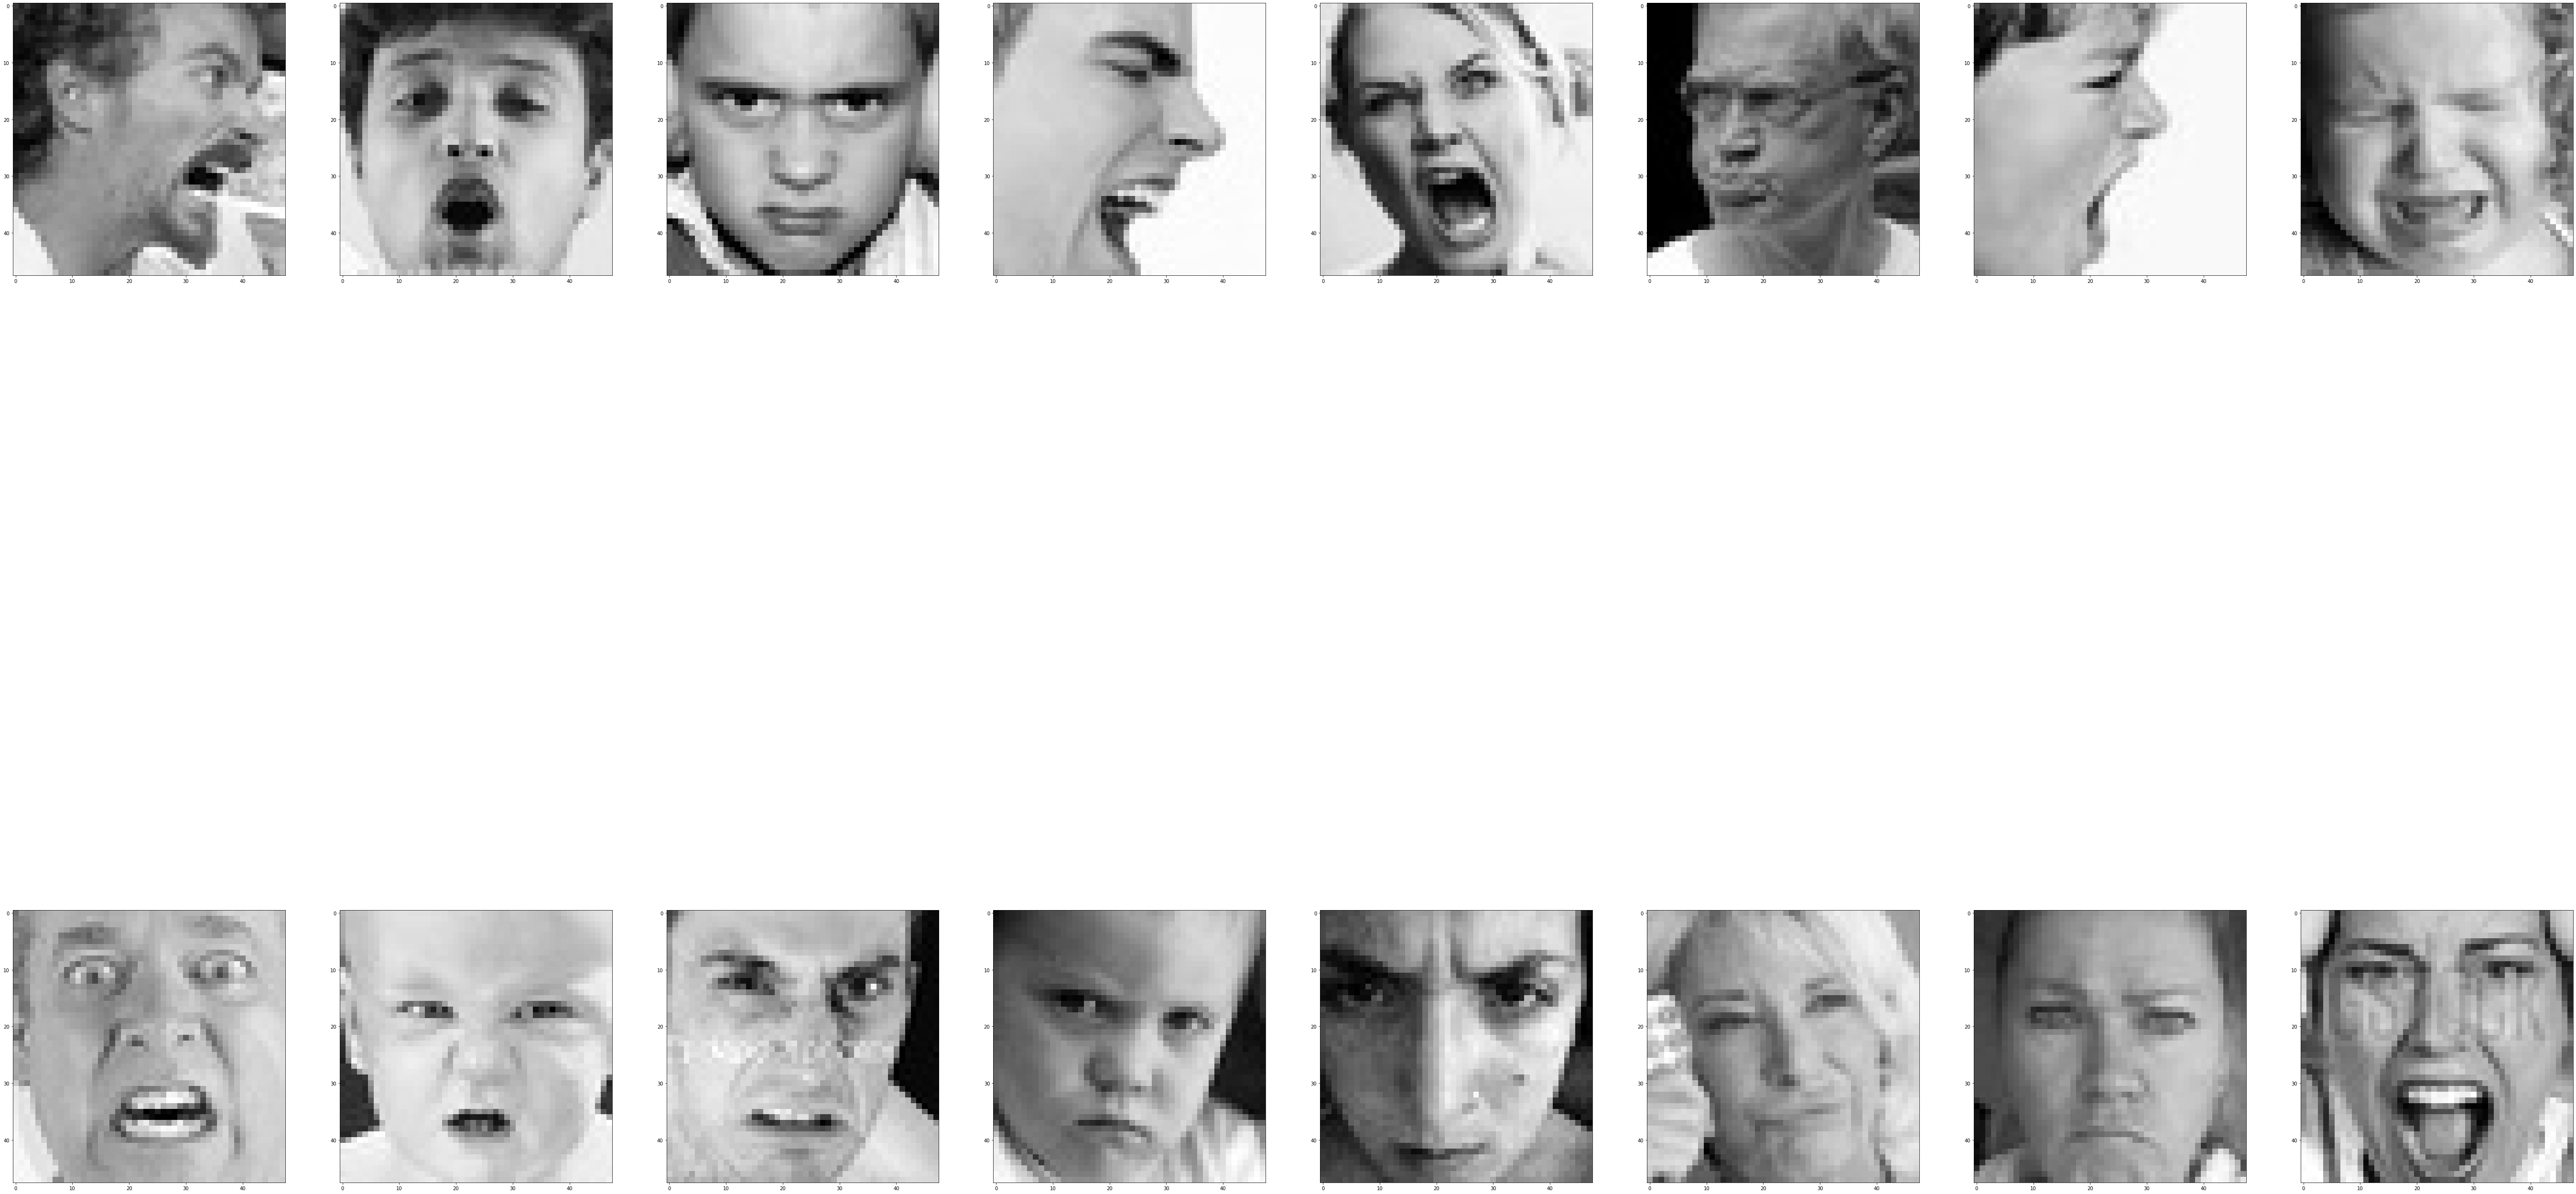

In [36]:
plotImages(images, values[1])